<a href="https://colab.research.google.com/github/secutron/RunTime/blob/master/GPipe0View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### View - obj (texture)

In [7]:
_ = !sudo apt update
_ = !sudo wget https://github.com/mmatl/travis_debs/raw/master/xenial/mesa_18.3.3-0.deb
_ = !sudo dpkg -i ./mesa_18.3.3-0.deb || true
_ = !sudo apt install -f
_ = !git clone https://github.com/mmatl/pyopengl.git
_ = !pip install ./pyopengl
_ = !pip install pyrender

In [8]:
import os, sys, cv2
from os.path import join
os.environ["PYOPENGL_PLATFORM"] = "osmesa"
import numpy as np
import pickle
import trimesh
import pyrender
import matplotlib.pyplot as plt

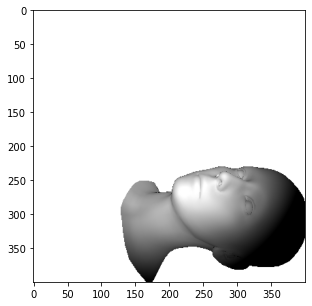

In [10]:
#fuze_trimesh = trimesh.load('/content/drive/My Drive/GTask/VOCA/pyrender/examples/models/fuze.obj')
#fuze_trimesh = trimesh.load('/content/drive/My Drive/GTask/VOCA/animation_output/meshes/00000.obj')
fuze_trimesh = trimesh.load('/content/drive/My Drive/animation_texture/hkim정면crop.obj')
#fuze_trimesh = trimesh.load('/content/drive/My Drive/FLAME-result/hkim정면crop.obj')

mesh = pyrender.Mesh.from_trimesh(fuze_trimesh)
scene = pyrender.Scene()
scene.add(mesh)

camera = pyrender.PerspectiveCamera(yfov=np.pi / 3.0, aspectRatio=1.0)
s = np.sqrt(2)/2
camera_pose = np.array([
    [0.0, -s,   s,   0.3],
    [1.0,  0.0, 0.0, 0.0],
    [0.0,  s,   s,   0.35],
    [0.0,  0.0, 0.0, 1.0],
])
scene.add(camera, pose=camera_pose)
light = pyrender.SpotLight(color=np.ones(3), intensity=3.0,
                            innerConeAngle=np.pi/16.0,
                            outerConeAngle=np.pi/6.0)
scene.add(light, pose=camera_pose)

# Use OffscreenRenderer to get image perspectives.
r = pyrender.OffscreenRenderer(400, 400)
color, depth = r.render(scene)

fig = plt.figure(figsize=(10, 5))

plt.imshow(color)